In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("WineQT.csv")
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
693,7.1,0.36,0.30,1.6,0.080,35.0,70.0,0.99693,3.44,0.50,9.4,5,987
384,9.2,0.59,0.24,3.3,0.101,20.0,47.0,0.99880,3.26,0.67,9.6,5,540
485,9.8,0.98,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4,5,684
720,7.7,0.58,0.01,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,7,1024
235,8.4,0.56,0.08,2.1,0.105,16.0,44.0,0.99580,3.13,0.52,11.0,5,333


In [6]:
df.drop(['Id'],inplace=True,axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [19]:
df['goodquality']=[1 if x>=7 else 0 for x in df['quality']]
df.drop('quality',axis=1,inplace=True)
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
658,8.7,0.330,0.38,3.3,0.063,10.0,19.0,0.99468,3.30,0.73,12.0,1
989,8.0,0.520,0.25,2.0,0.078,19.0,59.0,0.99612,3.30,0.48,10.2,0
88,8.1,1.330,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,0
823,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0,0
1035,6.5,0.900,0.00,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9,0


<Axes: >

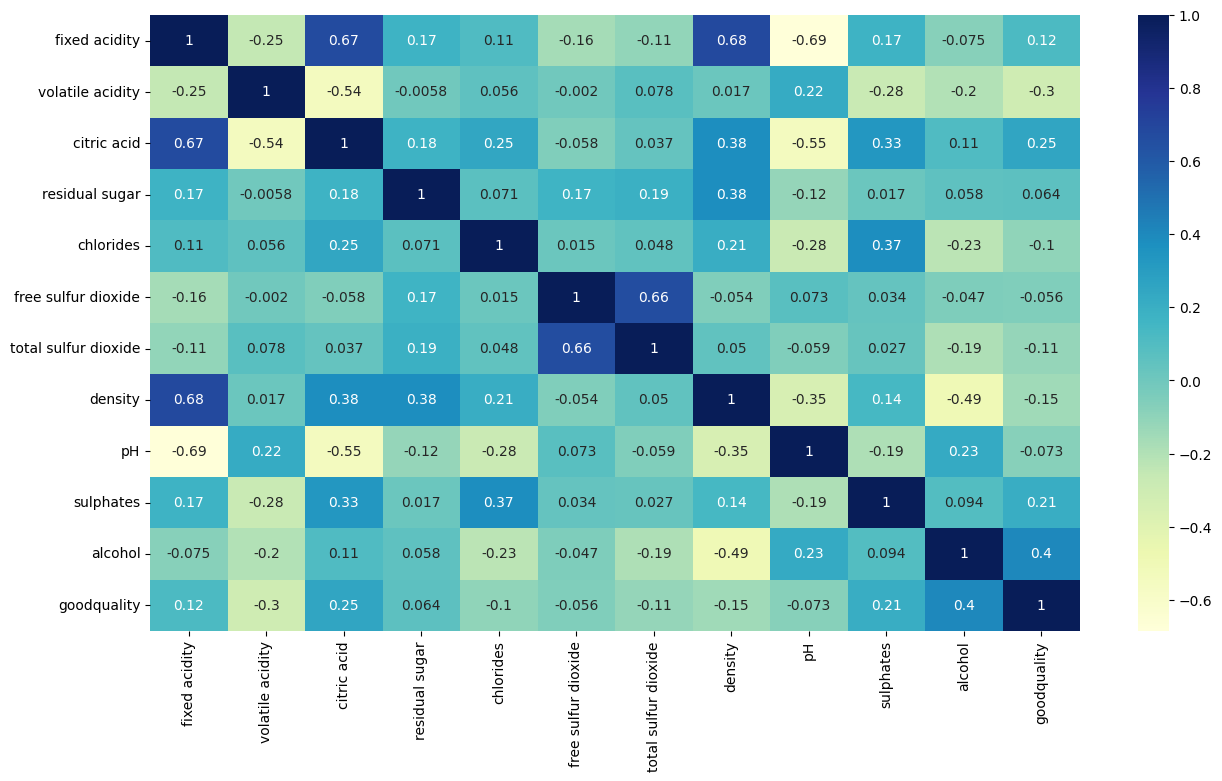

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

In [23]:
X=df.drop(['goodquality'],axis=1)
y=df['goodquality']

In [26]:
y.value_counts()

goodquality
0    984
1    159
Name: count, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [51]:
y_train.count()

914

In [92]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [104]:
model.fit(X_train.values,y_train.values)

DecisionTreeClassifier()

In [101]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 590 to 468
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         229 non-null    float64
 1   volatile acidity      229 non-null    float64
 2   citric acid           229 non-null    float64
 3   residual sugar        229 non-null    float64
 4   chlorides             229 non-null    float64
 5   free sulfur dioxide   229 non-null    float64
 6   total sulfur dioxide  229 non-null    float64
 7   density               229 non-null    float64
 8   pH                    229 non-null    float64
 9   sulphates             229 non-null    float64
 10  alcohol               229 non-null    float64
dtypes: float64(11)
memory usage: 21.5 KB


In [105]:
model.predict([[7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.4,0.85,11.0]])

array([1], dtype=int64)